In [1]:
# Packages
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt
import time


In [2]:
#Input data
data=np.load("/Users/gardasnagarjun/Downloads/datasets/bi-class/breast-cancer.npz", mmap_mode='r')
X_train=data['train_X'].astype('float32')
train_Y=data['train_Y'].astype('long')
X_test,test_Y=data['test_X'].astype('float32'),data['test_Y'].astype('long')
X_train

array([[-0.829218,  1.      , -0.111111, ...,  0.333333,  0.333333,
         1.      ],
       [-0.82036 ,  0.555556,  0.333333, ..., -0.111111,  1.      ,
        -1.      ],
       [-0.838149, -0.555556, -1.      , ...,  0.333333, -1.      ,
        -1.      ],
       ...,
       [-0.835423, -0.777778, -1.      , ..., -1.      , -1.      ,
        -1.      ],
       [-0.815531,  1.      , -0.555556, ..., -0.333333, -1.      ,
        -1.      ],
       [-0.836771, -1.      , -1.      , ..., -0.555556, -1.      ,
        -1.      ]], dtype=float32)

In [3]:
train_Y

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [4]:
# split the training dataset into train,val dataset
train_X,val_X,train_y,val_Y=train_test_split(X_train,train_Y,test_size=0.2)

print(len(train_X))
print(len(val_X))

437
110


In [5]:
# Checking shape
print(train_X.shape,val_X.shape,train_y.shape,val_Y.shape)
print(len(X_train))

(437, 10) (110, 10) (437,) (110,)
547


In [6]:

#Construct main,train,validation and test datasets for torch.util.data.dataloader:

main_data=[]
for i in range(len(X_train)):
    X_train.astype('float32')
    train_Y.astype('long')
    main_data.append([X_train[i],train_Y[i]])
    
mainloader=torch.utils.data.DataLoader(main_data,shuffle=True,batch_size=1)
i4,l4=next(iter(mainloader))
print(i4.shape)

train_data = []
for i in range(len(train_X)):
    train_X.astype('float32')
    train_y.astype('long')
    train_data.append([train_X[i], train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=1)
i1, l1 = next(iter(trainloader))
print(i1.shape)

val_data=[]
for i in range(len(val_X)):
    val_X.astype('float32')
    val_Y.astype('long')
    val_data.append([val_X[i], val_Y[i]])

valloader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=2)
i2, l2 = next(iter(valloader))
print(i2.shape)


test_data=[]
for i in range(len(X_test)):
    X_test.astype('float32')
    test_Y.astype('long')
    test_data.append([X_test[i],test_Y[i]])
    
testloader=torch.utils.data.DataLoader(test_data,shuffle=False)

i3,l3=next(iter(testloader))
print(i3.shape)

torch.Size([1, 10])
torch.Size([1, 10])
torch.Size([2, 10])
torch.Size([1, 10])


In [7]:
print(len(trainloader))
print(len(valloader))
print(len(testloader))
for i,j in enumerate(valloader):
    print(i,j)
    break

437
55
136
0 [tensor([[-0.8264,  1.0000,  0.1111, -0.3333, -0.5556,  1.0000,  1.0000,  0.7778,
          1.0000, -1.0000],
        [-0.8255,  0.5556, -0.3333,  0.1111, -0.5556, -0.5556, -1.0000, -0.3333,
         -0.5556, -1.0000]]), tensor([0, 1])]


In [8]:
#Define the model of your Neural Network:
class One_hidden(nn.Module):
    def __init__(self,n_hidden,n_output=2,n_feature=10):
        super(One_hidden,self).__init__()
        self.hidden=nn.Linear(n_feature,n_hidden)
        self.output=nn.Linear(n_hidden,n_output)

        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.output(x)
        
        return x


In [9]:
# Model definition
net_10=One_hidden(10)
print(net_10)

One_hidden(
  (hidden): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


## Train the model through  loss per epoch and step parameter:

In [10]:
# Train the model
def train_with_steps(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    #torch.manual_seed(0)
    n_total_steps = len(trainloader)
    num_epochs=20
    
    for epoch in range(num_epochs):
        for i,(x,y) in enumerate(trainloader):
            net.zero_grad()
            
            # Forward pass    
            output = net(x)
            loss = criterion(output, y)
        
        
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            if (i+1) % 120 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}],Step:[{i+1}/{n_total_steps}], Loss: {loss.item():.5f}')
                
    acc=accuracy(net,valloader)
    return acc
            
 #Calculate Accuracy:      
def accuracy(net,valloader):
    net.eval()
    with torch.no_grad():
        n_correct=0
        n_samples=0
        for x,y in valloader:
            output=net(x)
            _,predicted=torch.max(output.data,1)
            n_samples+=y.size(0)
            n_correct+=(predicted==y).sum().item()
            
        acc=100.0* n_correct/n_samples
        print(f'Accuracy of the network for val data: {acc} %')
        return acc

In [11]:
def accuracy_test(net,testloader):
    with torch.no_grad():
        net.eval()
        n_correct = 0
        n_samples = 0
        for z, y in testloader:
            outputs = net(z)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += y.size(0)
            n_correct += (predicted == y).sum().item()
            
        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network for test data: {acc} %')

In [ ]:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=train_with_steps(net,trainloader)
    
print(storage)

In [ ]:
net_best=One_hidden(10)
train_with_steps(net_best,trainloader)

In [ ]:
accuracy_test(net_best,testloader)

## Training the model through average loss per epoch:

In [12]:
def model_train(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # number of epochs to train the model
    n_epochs = 30  # suggest training between 20-50 epochs
    loss_values=[]

    for epoch in range(n_epochs):
    # monitor training loss
        train_loss = 0.0
    
    ###################
    # train the model #
    ###################
        for data, target in trainloader:
        # clear the gradients of all optimized variables
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = net(data)
        # calculate the loss
            loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update running training loss
            train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
        train_loss = train_loss/len(trainloader.dataset)
        loss_values.append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    plt.plot(loss_values)
    acc=accuracy(net,valloader)
    return acc

In [ ]:
train_new(net_best,trainloader)

Epoch: 1 	Training Loss: 0.623236
Epoch: 2 	Training Loss: 0.477603
Epoch: 3 	Training Loss: 0.341858
Epoch: 4 	Training Loss: 0.270067
Epoch: 5 	Training Loss: 0.225029
Epoch: 6 	Training Loss: 0.194247
Epoch: 7 	Training Loss: 0.171735
Epoch: 8 	Training Loss: 0.155820
Epoch: 9 	Training Loss: 0.143787
Epoch: 10 	Training Loss: 0.134604
Epoch: 11 	Training Loss: 0.127744
Epoch: 12 	Training Loss: 0.122063
Epoch: 13 	Training Loss: 0.117467
Epoch: 14 	Training Loss: 0.114159
Epoch: 15 	Training Loss: 0.110939
Epoch: 16 	Training Loss: 0.108000
Epoch: 17 	Training Loss: 0.105895
Epoch: 18 	Training Loss: 0.104250
Epoch: 19 	Training Loss: 0.102513
Epoch: 20 	Training Loss: 0.100818
Epoch: 21 	Training Loss: 0.099433
Epoch: 22 	Training Loss: 0.098131
Epoch: 23 	Training Loss: 0.097880
Epoch: 24 	Training Loss: 0.096580
Epoch: 25 	Training Loss: 0.095294
Epoch: 26 	Training Loss: 0.094767
Epoch: 27 	Training Loss: 0.094170
Epoch: 28 	Training Loss: 0.093236
Epoch: 29 	Training Loss: 0.0

Epoch: 16 	Training Loss: 0.072149
Epoch: 17 	Training Loss: 0.071793
Epoch: 18 	Training Loss: 0.071110
Epoch: 19 	Training Loss: 0.071151
Epoch: 20 	Training Loss: 0.068880
Epoch: 21 	Training Loss: 0.070513
Epoch: 22 	Training Loss: 0.070423
Epoch: 23 	Training Loss: 0.069419
Epoch: 24 	Training Loss: 0.069324
Epoch: 25 	Training Loss: 0.068748
Epoch: 26 	Training Loss: 0.068804
Epoch: 27 	Training Loss: 0.068525
Epoch: 28 	Training Loss: 0.067747
Epoch: 29 	Training Loss: 0.067497
Epoch: 30 	Training Loss: 0.066912
Accuracy of the network for val data: 95.45454545454545 %
Epoch: 1 	Training Loss: 0.452687
Epoch: 2 	Training Loss: 0.147393
Epoch: 3 	Training Loss: 0.106089
Epoch: 4 	Training Loss: 0.097612
Epoch: 5 	Training Loss: 0.092790
Epoch: 6 	Training Loss: 0.089834
Epoch: 7 	Training Loss: 0.087871
Epoch: 8 	Training Loss: 0.086253
Epoch: 9 	Training Loss: 0.082982
Epoch: 10 	Training Loss: 0.083011
Epoch: 11 	Training Loss: 0.080441
Epoch: 12 	Training Loss: 0.078929
Epoch:

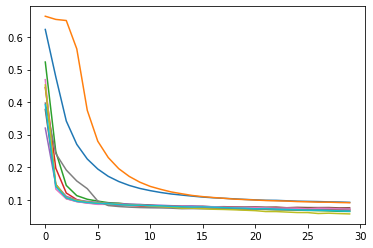

In [13]:
# Iterating to find the best hidden nodes and checking the accuracy of it:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train(net,trainloader)
    
print(storage)

Epoch: 1 	Training Loss: 0.371722
Epoch: 2 	Training Loss: 0.128347
Epoch: 3 	Training Loss: 0.099225
Epoch: 4 	Training Loss: 0.092422
Epoch: 5 	Training Loss: 0.089575
Epoch: 6 	Training Loss: 0.087358
Epoch: 7 	Training Loss: 0.084504
Epoch: 8 	Training Loss: 0.083678
Epoch: 9 	Training Loss: 0.085245
Epoch: 10 	Training Loss: 0.084117
Epoch: 11 	Training Loss: 0.083290
Epoch: 12 	Training Loss: 0.082406
Epoch: 13 	Training Loss: 0.083098
Epoch: 14 	Training Loss: 0.081143
Epoch: 15 	Training Loss: 0.081918
Epoch: 16 	Training Loss: 0.081759
Epoch: 17 	Training Loss: 0.081066
Epoch: 18 	Training Loss: 0.081551
Epoch: 19 	Training Loss: 0.080127
Epoch: 20 	Training Loss: 0.080690
Epoch: 21 	Training Loss: 0.080616
Epoch: 22 	Training Loss: 0.080384
Epoch: 23 	Training Loss: 0.080060
Epoch: 24 	Training Loss: 0.080088
Epoch: 25 	Training Loss: 0.080826
Epoch: 26 	Training Loss: 0.080158
Epoch: 27 	Training Loss: 0.078247
Epoch: 28 	Training Loss: 0.080683
Epoch: 29 	Training Loss: 0.0

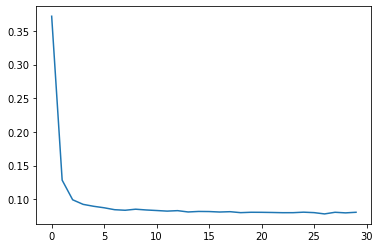

In [14]:
# Best hidden node is used to define and train the model
start_time_best=time.time()
model_best=One_hidden(7)
model_train(model_best,mainloader)
end_time_best=time.time()
print(f"Training time: {end_time_best-start_time_best}s") # Total training time

In [15]:
accuracy_test(model_best,testloader) # Final accuracy

Accuracy of the network for test data: 96.32352941176471 %
